# <div style="display: flex; justify-content: center; background-color:#073b4c; font-family:Times New Roman; color:#06d6a0; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 80px; border-style: solid; border-color: #06d6a0; font-weight: bold;"> Customer Segmentation</div>

<br>    
<p style="text-align: center;">
<img src="Images\CustomerSegmentaion.png" style='width: 550px; height: 550px;'>
</p>    

- **Problem Statement**:

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

<a id="top"></a>

# <div style="background-color:#073b4c; font-family:Times New Roman; color:#06d6a0; padding: 10px; line-height: 1; border-radius: 200px; margin-bottom: 0em; text-align: center; font-size: 50px; border-style: solid; border-color: #06d6a0; font-weight: bold;"> Table Of Contents</div>

* [Importing Libraries](#1)
* [Exploratory Data Analysis](#2)
* [Modeling](#3)

<a id="1"></a>

# <div style="background-color:#073b4c; font-family:Times New Roman; color:#06d6a0; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 40px; border-style: solid; border-color: #06d6a0; font-weight: bold;"> Importing Libraries</div>

In [33]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv("Data\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<a id="2"></a>

# <div style="background-color:#073b4c; font-family:Times New Roman; color:#06d6a0; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 40px; border-style: solid; border-color: #06d6a0; font-weight: bold;"> Exploratory Data Analysis</div>

In [35]:
numCols = df.select_dtypes(include=["int"])

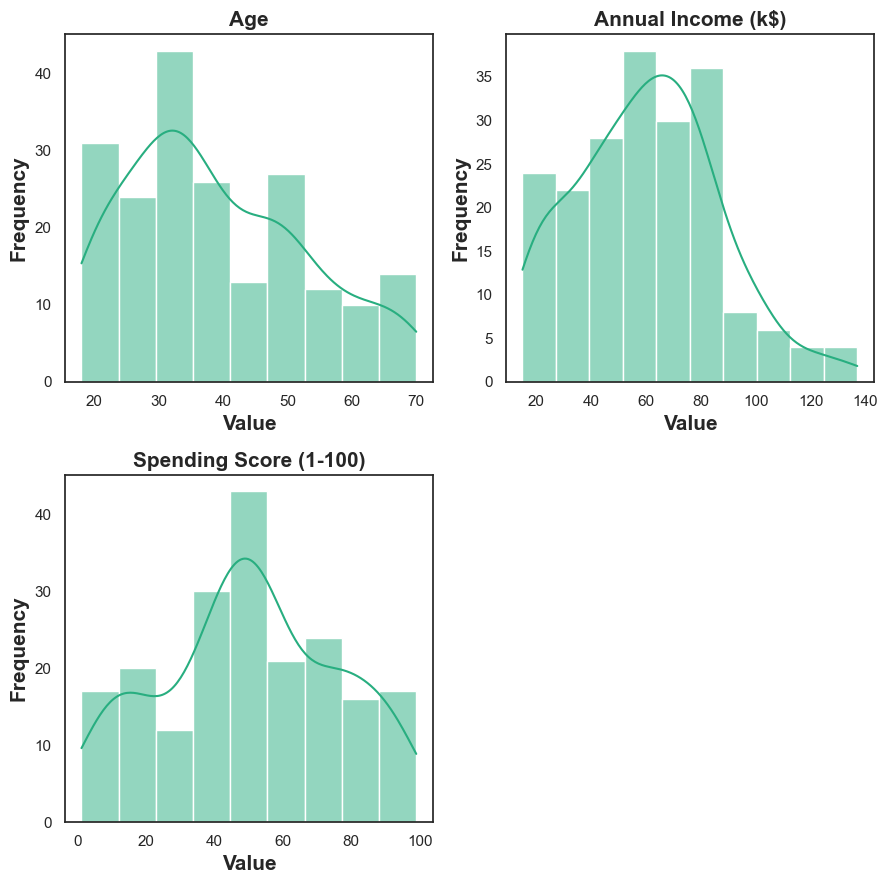

In [36]:
# sns.set(style="darkgrid", rc={"figure.facecolor":"#edf2f4"})
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9, 9))
axes = axes.flatten()

for index, col in enumerate(numCols.columns[1:]):                       
    sns.histplot(numCols[col], ax=axes[index], kde=True, color="#28ae80")
    axes[index].set_title(f"{col}", fontsize=15, fontweight="bold")
    axes[index].set_xlabel("Value", fontsize=15, fontweight="bold")
    axes[index].set_ylabel("Frequency", fontsize=15, fontweight="bold")

# Delete last axis
fig.delaxes(axes[-1])

plt.tight_layout()

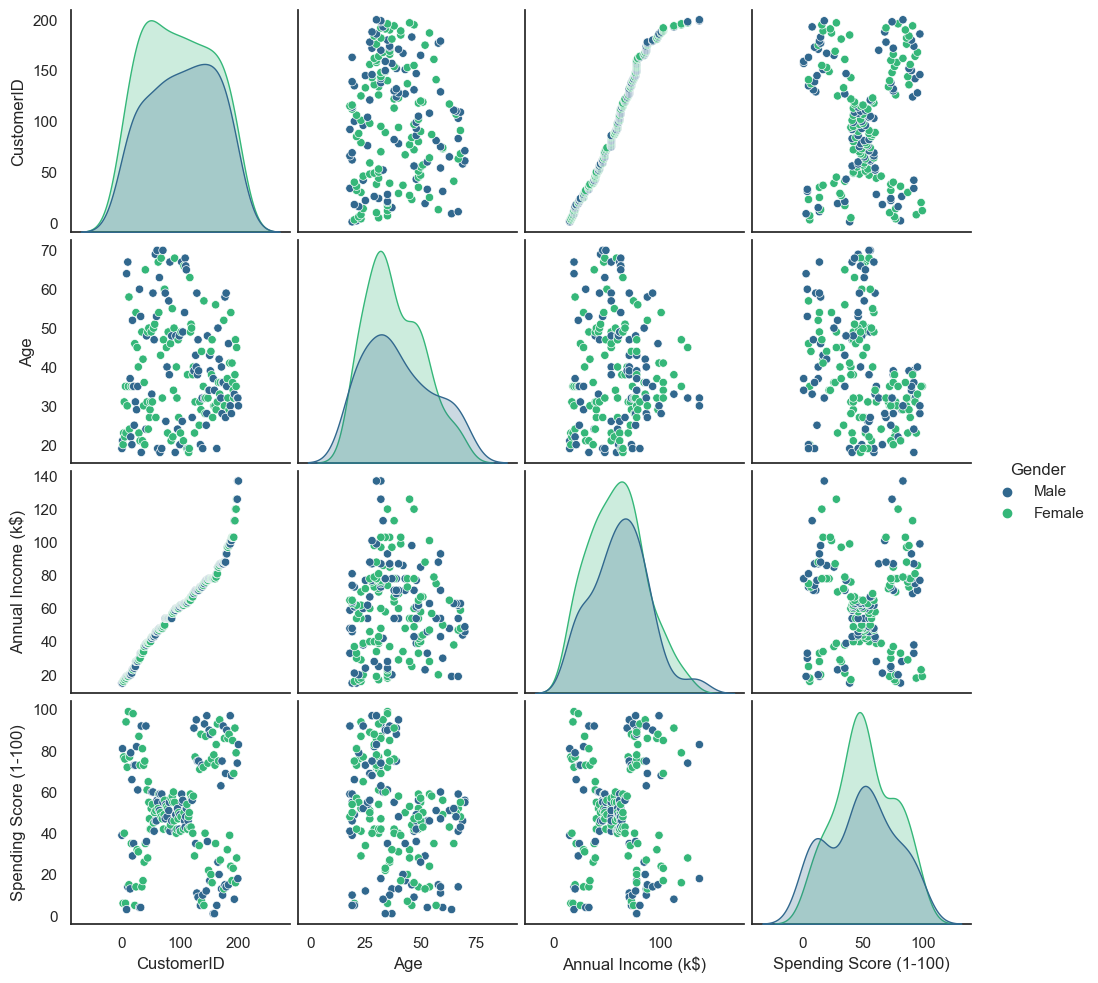

In [37]:
sns.set(style="white")
custom_palette = ["#1f77b4", "#ff7f0e"]
sns.pairplot(df, hue="Gender", palette="viridis");

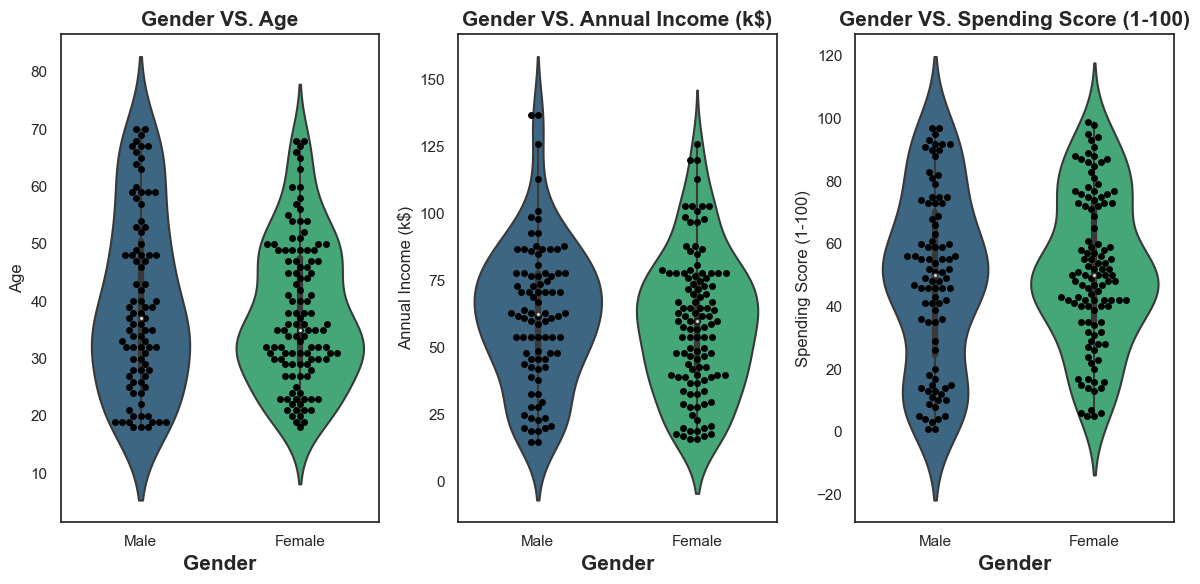

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axes = axes.flatten()

for index, col in enumerate(df.columns[2:]):
    sns.swarmplot(data=df, x='Gender', y=col, ax=axes[index], color="black")
    sns.violinplot(data=df, x='Gender', y=col, ax=axes[index], palette="viridis");
    axes[index].set_xlabel("Gender", fontweight="bold", fontsize=15)
    axes[index].set_title(f"Gender VS. {col}", fontweight="bold", fontsize=15)

plt.tight_layout()

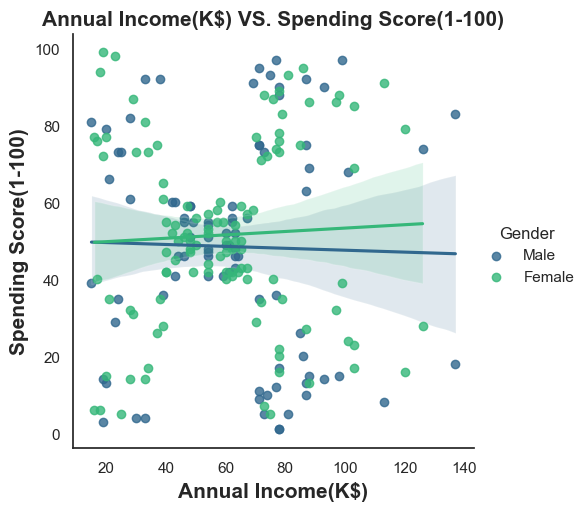

In [39]:
sns.lmplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", palette="viridis");
plt.title("Annual Income(K$) VS. Spending Score(1-100)", fontweight="bold", fontsize=15)
plt.xlabel("Annual Income(K$)", fontweight="bold", fontsize=15)
plt.ylabel("Spending Score(1-100)", fontweight="bold", fontsize=15);

<a id="3"></a>

# <div style="background-color:#073b4c; font-family:Times New Roman; color:#06d6a0; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 40px; border-style: solid; border-color: #06d6a0; font-weight: bold;"> Modeling</div>

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#073b4c; font-size:200%; font-weight: 500; color:#06d6a0; overflow:hidden;">`K-Means`</span>

<div style="background-color:#073b4c; font-family:Times New Roman; color:#06d6a0; padding: 10px; line-height: 1; border-radius: 70px;  text-align: center; font-size: 40px; border-style: solid; border-color: #06d6a0; font-weight: bold;"> Segmantaion Using Annual Income & Spending Score</div> 

In [40]:
X = df.iloc[:, [3, 4]].values

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#073b4c; font-size:200%; font-weight: 500; color:#06d6a0; overflow:hidden;">`Inertia`</span>

In [41]:
kInertia = {}

for k in np.arange(1, 11):
    model = KMeans(n_clusters=k, 
        n_init=10, 
        init="k-means++", 
        random_state=123)
    model.fit(X)
    inertia = model.inertia_
    kInertia[k] = inertia

In [42]:
data = [go.Scatter(x=list(kInertia.keys()), 
            y=list(kInertia.values()), 
            mode='markers+lines', 
            marker=dict(size=10), 
            line=dict(color="#3DFFE2", width=4))]

layout = go.Layout(title=dict(text="Elbow Method Plot", 
                                font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                    xaxis=dict(title=dict(text="Number Of Clusters (K)", 
                                            font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                                tickfont=dict(color="white", size=14)),
                    yaxis=dict(title=dict(text="Inertia", 
                                font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                                tickfont=dict(color="white", size=14)),
                    legend=dict(font=dict(color="white")),
                    height=550 ,
                    paper_bgcolor="#1E2434", 
                    plot_bgcolor="#1E2434")

fig = go.Figure(data, layout)

fig

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#073b4c; font-size:200%; font-weight: 500; color:#06d6a0; overflow:hidden;">`Silhouette Score`</span>

In [43]:
kSilhoutte = {}

for k in np.arange(2, 11):
    model = KMeans(n_clusters=k, 
        n_init=10, 
        init="k-means++", 
        random_state=123)
    model.fit(X)
    silhouette = silhouette_score(X, model.labels_)
    kSilhoutte[k] = silhouette

In [44]:
data = [go.Scatter(x=list(kSilhoutte.keys()), 
            y=list(kSilhoutte.values()), 
            mode='markers+lines', 
            marker=dict(size=10), 
            line=dict(color="#3DFFE2", width=4))]

layout = go.Layout(title=dict(text="Silhoutte Score VS. Number Of Clusters", 
                                font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                    xaxis=dict(title=dict(text="Number Of Clusters(K)", 
                                            font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                                tickfont=dict(color="white", size=14)),
                    yaxis=dict(title=dict(text="Silhoutte Score", 
                                font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                                tickfont=dict(color="white", size=14)),
                    legend=dict(font=dict(color="white")),
                    height=550 ,
                    paper_bgcolor="#1E2434", 
                    plot_bgcolor="#1E2434")

fig = go.Figure(data, layout)

fig

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#073b4c; font-size:200%; font-weight: 500; color:#06d6a0; overflow:hidden;">`Final Clusters`</span>

In [45]:
BestModel = KMeans(
    n_clusters=5, 
    init="k-means++", 
    n_init=10, 
    random_state=123
)
BestModel.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=123)

In [46]:
labels = BestModel.labels_
centroids = BestModel.cluster_centers_

In [47]:
scatter1 = go.Scatter(x=centroids[:, 0], 
                    y=centroids[:, 1], 
                    mode="markers", 
                    marker=dict(
                        size=17, 
                        color="#3DFFE2", 
                        symbol="star",
                        line=dict(width=1)),
                    name="Centroid"
                    )  

scatter2 = go.Scatter(x=X[labels == 0, 0], 
                    y=X[labels == 0, 1], 
                    mode="markers", 
                    marker=dict(color='#8338ec', 
                                size=10,
                                line=dict(width=1, color="#2f2f2f")), 
                    name="Cluster 0")

scatter3 = go.Scatter(x=X[labels == 1, 0], 
                    y=X[labels == 1, 1], 
                    mode="markers", 
                    marker=dict(color="#ff006e", 
                                size=10, 
                                line=dict(width=1, color="#2f2f2f")), 
                    name="Cluster 1")

scatter4 = go.Scatter(x=X[labels == 2, 0], 
                    y=X[labels == 2, 1], 
                    mode="markers", 
                    marker=dict(color="#3a86ff", 
                                size=10, 
                                line=dict(width=1, color="#2f2f2f")), 
                    name="Cluster 2")

scatter5 = go.Scatter(x=X[labels == 3, 0], 
                    y=X[labels == 3, 1], 
                    mode="markers", 
                    marker=dict(color="#ffbe0b", 
                                size=10, 
                                line=dict(width=1, color="#2f2f2f")), 
                    name="Cluster 3")

scatter6 = go.Scatter(x=X[labels == 4, 0], 
                    y=X[labels == 4, 1], 
                    mode="markers", 
                    marker=dict(color="#0a9396", 
                                size=10, 
                                line=dict(width=1, color="#2f2f2f")), 
                    name="Cluster 4")


data = [scatter1, scatter2, scatter3, scatter4, scatter5, scatter6]

layout = go.Layout(title=dict(text="Customer Groups", 
                                font=dict(color="white", size=35, family="Times New Roman")), 
                    xaxis=dict(title=dict(text="Annual Income (k$)", font=dict(color="white", size=30, family="Times New Roman")), 
                                tickfont=dict(color="white", size=14)),
                    yaxis=dict(title=dict(text="Spending Score (1 - 100)", font=dict(color="white", size=27, family="Times New Roman")), 
                                tickfont=dict(color="white", size=14)),
                    legend=dict(font=dict(color="white", family="Times New Roman", size=15)),
                    hovermode="closest" ,
                    width=1410, 
                    height=750,
                    paper_bgcolor="#1E2434", 
                    plot_bgcolor="#1E2434")

fig = go.Figure(data, layout)

fig

<div style="background-color:#073b4c; font-family:Times New Roman; color:#06d6a0; padding: 10px; line-height: 1; border-radius: 70px;  text-align: center; font-size: 40px; border-style: solid; border-color: #06d6a0; font-weight: bold;"> Segmantaion Using Age & Spending Score</div> 

In [48]:
X = df.iloc[:, [2, 4]].values

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#073b4c; font-size:200%; font-weight: 500; color:#06d6a0; overflow:hidden;">`Inertia`</span>

In [49]:
kInertia = {}

for k in np.arange(1, 11):
    model = KMeans(n_clusters=k, 
        n_init=10, 
        init="k-means++", 
        random_state=123)
    model.fit(X)
    inertia = model.inertia_
    kInertia[k] = inertia

In [50]:
data = [go.Scatter(x=list(kInertia.keys()), 
            y=list(kInertia.values()), 
            mode='markers+lines', 
            marker=dict(size=10), 
            line=dict(color="#3DFFE2", width=4))]

layout = go.Layout(title=dict(text="Elbow Method Plot", 
                                font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                    xaxis=dict(title=dict(text="Number Of Clusters (K)", 
                                            font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                                tickfont=dict(color="white", size=14)),
                    yaxis=dict(title=dict(text="Inertia", 
                                font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                                tickfont=dict(color="white", size=14)),
                    legend=dict(font=dict(color="white")),
                    height=550 ,
                    paper_bgcolor="#1E2434", 
                    plot_bgcolor="#1E2434")

fig = go.Figure(data, layout)

fig

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#073b4c; font-size:200%; font-weight: 500; color:#06d6a0; overflow:hidden;">`Silhouette Score`</span>

In [51]:
kSilhoutte = {}

for k in np.arange(2, 11):
    model = KMeans(n_clusters=k, 
        n_init=10, 
        init="k-means++", 
        random_state=123)
    model.fit(X)
    silhouette = silhouette_score(X, model.labels_)
    kSilhoutte[k] = silhouette

In [52]:
data = [go.Scatter(x=list(kSilhoutte.keys()), 
            y=list(kSilhoutte.values()), 
            mode='markers+lines', 
            marker=dict(size=10), 
            line=dict(color="#3DFFE2", width=4))]

layout = go.Layout(title=dict(text="Silhoutte Score VS. Number Of Clusters", 
                                font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                    xaxis=dict(title=dict(text="Number Of Clusters(K)", 
                                            font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                                tickfont=dict(color="white", size=14)),
                    yaxis=dict(title=dict(text="Silhoutte Score", 
                                font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                                tickfont=dict(color="white", size=14)),
                    legend=dict(font=dict(color="white")),
                    height=550 ,
                    paper_bgcolor="#1E2434", 
                    plot_bgcolor="#1E2434")

fig = go.Figure(data, layout)

fig

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#073b4c; font-size:200%; font-weight: 500; color:#06d6a0; overflow:hidden;">`Final Clusters`</span>

In [53]:
BestModel = KMeans(
    n_clusters=4, 
    init="k-means++", 
    n_init=10, 
    random_state=123
)
BestModel.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=123)

In [54]:
labels = BestModel.labels_
centroids = BestModel.cluster_centers_

In [55]:
scatter1 = go.Scatter(x=centroids[:, 0], 
                    y=centroids[:, 1], 
                    mode="markers", 
                    marker=dict(
                        size=17, 
                        color="#3DFFE2", 
                        symbol="star",
                        line=dict(width=1)),
                    name="Centroid"
                    )  

scatter2 = go.Scatter(x=X[labels == 0, 0], 
                    y=X[labels == 0, 1], 
                    mode="markers", 
                    marker=dict(color='#8338ec', 
                                size=10,
                                line=dict(width=1, color="#2f2f2f")), 
                    name="Cluster 0")

scatter3 = go.Scatter(x=X[labels == 1, 0], 
                    y=X[labels == 1, 1], 
                    mode="markers", 
                    marker=dict(color="#ff006e", 
                                size=10, 
                                line=dict(width=1, color="#2f2f2f")), 
                    name="Cluster 1")

scatter4 = go.Scatter(x=X[labels == 2, 0], 
                    y=X[labels == 2, 1], 
                    mode="markers", 
                    marker=dict(color="#3a86ff", 
                                size=10, 
                                line=dict(width=1, color="#2f2f2f")), 
                    name="Cluster 2")

scatter5 = go.Scatter(x=X[labels == 3, 0], 
                    y=X[labels == 3, 1], 
                    mode="markers", 
                    marker=dict(color="#ffbe0b", 
                                size=10, 
                                line=dict(width=1, color="#2f2f2f")), 
                    name="Cluster 3")

scatter6 = go.Scatter(x=X[labels == 4, 0], 
                    y=X[labels == 4, 1], 
                    mode="markers", 
                    marker=dict(color="#0a9396", 
                                size=10, 
                                line=dict(width=1, color="#2f2f2f")), 
                    name="Cluster 4")


data = [scatter1, scatter2, scatter3, scatter4, scatter5, scatter6]

layout = go.Layout(title=dict(text="Customer Groups", 
                                font=dict(color="white", size=35, family="Times New Roman")), 
                    xaxis=dict(title=dict(text="Age", font=dict(color="white", size=30, family="Times New Roman")), 
                                tickfont=dict(color="white", size=14)),
                    yaxis=dict(title=dict(text="Spending Score (1 - 100)", font=dict(color="white", size=27, family="Times New Roman")), 
                                tickfont=dict(color="white", size=14)),
                    legend=dict(font=dict(color="white", family="Times New Roman", size=15)),
                    hovermode="closest" ,
                    width=1410, 
                    height=750,
                    paper_bgcolor="#1E2434", 
                    plot_bgcolor="#1E2434")

fig = go.Figure(data, layout)

fig

<div style="background-color:#073b4c; font-family:Times New Roman; color:#06d6a0; padding: 10px; line-height: 1; border-radius: 70px;  text-align: center; font-size: 40px; border-style: solid; border-color: #06d6a0; font-weight: bold;"> Segmantaion Using Age, Annual Income & Spending Score</div> 

In [56]:
X = df.iloc[:, 2:].values

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#073b4c; font-size:200%; font-weight: 500; color:#06d6a0; overflow:hidden;">`Inertia`</span>

In [57]:
kInertia = {}

for k in np.arange(1, 11):
    model = KMeans(n_clusters=k, 
        n_init=10, 
        init="k-means++", 
        random_state=123)
    model.fit(X)
    inertia = model.inertia_
    kInertia[k] = inertia

In [58]:
data = [go.Scatter(x=list(kInertia.keys()), 
            y=list(kInertia.values()), 
            mode='markers+lines', 
            marker=dict(size=10), 
            line=dict(color="#3DFFE2", width=4))]

layout = go.Layout(title=dict(text="Elbow Method Plot", 
                                font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                    xaxis=dict(title=dict(text="Number Of Clusters (K)", 
                                            font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                                tickfont=dict(color="white", size=14)),
                    yaxis=dict(title=dict(text="Inertia", 
                                font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                                tickfont=dict(color="white", size=14)),
                    legend=dict(font=dict(color="white")),
                    height=550 ,
                    paper_bgcolor="#1E2434", 
                    plot_bgcolor="#1E2434")

fig = go.Figure(data, layout)

fig

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#073b4c; font-size:200%; font-weight: 500; color:#06d6a0; overflow:hidden;">`Silhouette Score`</span>

In [59]:
kSilhoutte = {}

for k in np.arange(2, 11):
    model = KMeans(n_clusters=k, 
        n_init=10, 
        init="k-means++", 
        random_state=42)
    model.fit(X)
    silhouette = silhouette_score(X, model.labels_)
    kSilhoutte[k] = silhouette

In [60]:
data = [go.Scatter(x=list(kSilhoutte.keys()), 
            y=list(kSilhoutte.values()), 
            mode='markers+lines', 
            marker=dict(size=10), 
            line=dict(color="#3DFFE2", width=4))]

layout = go.Layout(title=dict(text="Silhoutte Score VS. Number Of Clusters", 
                                font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                    xaxis=dict(title=dict(text="Number Of Clusters(K)", 
                                            font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                                tickfont=dict(color="white", size=14)),
                    yaxis=dict(title=dict(text="Silhoutte Score", 
                                font=dict(color="white", 
                                            family="Times New Roman", 
                                            size=27)),
                                tickfont=dict(color="white", size=14)),
                    legend=dict(font=dict(color="white")),
                    height=550 ,
                    paper_bgcolor="#1E2434", 
                    plot_bgcolor="#1E2434")

fig = go.Figure(data, layout)

fig

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#073b4c; font-size:200%; font-weight: 500; color:#06d6a0; overflow:hidden;">`Final Clusters`</span>

In [61]:
BestModel = KMeans(
    n_clusters=6, 
    init="k-means++", 
    n_init=10, 
    random_state=123
)
BestModel.fit(X)

KMeans(n_clusters=6, n_init=10, random_state=123)

In [62]:
labels = BestModel.labels_
centroids = BestModel.cluster_centers_

In [63]:
scatter = go.Scatter3d(x=centroids[: , 0], 
                    y=centroids[: , 1], 
                    z=centroids[: , 2], 
                    mode="markers", 
                    marker=dict(size=15, 
                                symbol="diamond", 
                                color="#440154", 
                                line=dict(width=2)),
                    name="Centroid")

scatter0 = go.Scatter3d(x=X[labels == 0, 0], 
                    y=X[labels == 0, 1], 
                    z=X[labels == 0, 2], 
                    mode="markers", 
                    marker=dict(size=15, 
                                color="#3d4d8a", 
                                line=dict(width=2)),
                    name="Cluster 0")

scatter1 = go.Scatter3d(x=X[labels == 1, 0], 
                    y=X[labels == 1, 1], 
                    z=X[labels == 1, 2], 
                    mode="markers",
                    marker=dict(size=15, 
                                color="#24878e", 
                                line=dict(width=2)), 
                    name="Cluster 1")

scatter2 = go.Scatter3d(x=X[labels == 2, 0], 
                    y=X[labels == 2, 1], 
                    z=X[labels == 2, 2], 
                    mode="markers", 
                    marker=dict(size=15, 
                                color="#40bd72",
                                line=dict(width=2)),
                    name="Cluster 2")

scatter3 = go.Scatter3d(x=X[labels == 3, 0], 
                    y=X[labels == 3, 1], 
                    z=X[labels == 3, 2], 
                    mode="markers", 
                    marker=dict(size=15, 
                                color="#cde11d", 
                                line=dict(width=2)),
                    name="Cluster 3")

scatter4 = go.Scatter3d(x=X[labels == 4, 0], 
                    y=X[labels == 4, 1], 
                    z=X[labels == 4, 2], 
                    mode="markers", 
                    marker=dict(size=15, 
                                color="#95d840", 
                                line=dict(width=2)),
                    name="Cluster 4")

scatter5 = go.Scatter3d(x=X[labels == 5, 0], 
                    y=X[labels == 5, 1], 
                    z=X[labels == 5, 2], 
                    mode="markers", 
                    marker=dict(size=15, 
                                color="#fde725", 
                                line=dict(width=2)),
                    name="Cluster 5")

data = [scatter, scatter0, scatter1, scatter2, scatter3, scatter4, scatter5]

layout = go.Layout(title=dict(text="Customer Groups", font=dict(color="white", size=35, family="Times New Roman")), 
                    scene=dict(xaxis=dict(title=dict(text="Age", font=dict(color="white", size=30, family="Times New Roman")), 
                                tickfont=dict(color="white", size=14)), 
                    yaxis=dict(title=dict(text="Annual Income (k$)", font=dict(color="white", size=27, family="Times New Roman")), 
                                tickfont=dict(color="white", size=14)), 
                    zaxis=dict(title=dict(text="Spending Score (1-100)", font=dict(color="white", size=27, family="Times New Roman")), 
                                tickfont=dict(color="white", size=14))),
                    legend=dict(font=dict(color="white", family="Times New Roman", size=15)),
                    width=1410, 
                    height=700,
                    paper_bgcolor="#1E2434", 
                    plot_bgcolor="#1E2434")

fig = go.Figure(data, layout)

fig

<body>
    <center>
        <div style="font-family: Comic Sans MS; background-color: #073b4c; color: #06d6a0; padding: 12px; line-height: 1; font-weight: bold; font-size: 50px; border-style: solid; border-color: dark green;">
            By: Mohamed Ghannnam
        </div>
    </center>
    <center>
        <div style="font-family: Trebuchet MS; background-color: #073b4c; color: #06d6a0; padding: 12px; line-height: 1; font-weight: bold; font-size: 50px; border-style: solid; border-color: dark green;">
            Thank You!
        </div>
        <div style="font-family: Trebuchet MS; background-color: #073b4c; color: #06d6a0; padding: 12px; line-height: 1; font-weight: bold; font-size: 50px; border-style: solid; border-color: dark green; margin-top: 20px;">
            <a href="https://www.linkedin.com/in/mohamedghannnam/" style="text-decoration: none; color: #06d6a0;">
                <i class="fa-brands fa-linkedin" style="font-size: 50px; vertical-align: middle; color: #06d6a0;"></i> Click Here ==> LinkedIn 
            </a>
        </div>
    </center>
</body>
